# Inspecting building's dataframe

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk
from pyaxis import pyaxis

In [98]:
px_data = pyaxis.parse("Statistical_data/buildings_data.px", encoding="utf-8")
df = pd.DataFrame(px_data["DATA"])
df.columns
df.columns = ["territory", "building_cat", "build_period", "year", "quantity"]
df["quantity"] = pd.to_numeric(df["quantity"])

In [99]:
df.head()

,territory,building_cat,build_period,year,quantity
0,Schweiz,Einfamilienhäuser,Vor 1919,2010,133198
1,Schweiz,Einfamilienhäuser,Vor 1919,2011,125763
2,Schweiz,Einfamilienhäuser,Vor 1919,2012,126508
3,Schweiz,Einfamilienhäuser,Vor 1919,2013,126055
4,Schweiz,Einfamilienhäuser,Vor 1919,2014,126037


In [100]:
territory_df = df.groupby(["territory", "build_period"])["quantity"].sum().reset_index()

In [101]:
for ind in territory_df.index:
    print(ind)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [102]:
territory_df[territory_df.territory.str.contains(r"\b5627\b", case=False, na=False)]

,territory,build_period,quantity
20892,......5627 Chavannes-près-Renens,1919-1945,762
20893,......5627 Chavannes-près-Renens,1946-1960,354
20894,......5627 Chavannes-près-Renens,1961-1970,446
20895,......5627 Chavannes-près-Renens,1971-1980,561
20896,......5627 Chavannes-près-Renens,1981-1990,387
20897,......5627 Chavannes-près-Renens,1991-2000,196
20898,......5627 Chavannes-près-Renens,2001-2005,224
20899,......5627 Chavannes-près-Renens,2006-2010,230
20900,......5627 Chavannes-près-Renens,2011-2015,82
20901,......5627 Chavannes-près-Renens,2016-2020,110


In [103]:
territory_df["MunicipalityNumber"]=0
for i in range(9000):
    ID = str(i)
    territory_df.loc[territory_df.territory.str.contains(ID, case=False, na=False),"MunicipalityNumber"] = i


In [104]:
territory_df[territory_df["MunicipalityNumber"]==5627]

,territory,build_period,quantity,MunicipalityNumber
20892,......5627 Chavannes-près-Renens,1919-1945,762,5627
20893,......5627 Chavannes-près-Renens,1946-1960,354,5627
20894,......5627 Chavannes-près-Renens,1961-1970,446,5627
20895,......5627 Chavannes-près-Renens,1971-1980,561,5627
20896,......5627 Chavannes-près-Renens,1981-1990,387,5627
20897,......5627 Chavannes-près-Renens,1991-2000,196,5627
20898,......5627 Chavannes-près-Renens,2001-2005,224,5627
20899,......5627 Chavannes-près-Renens,2006-2010,230,5627
20900,......5627 Chavannes-près-Renens,2011-2015,82,5627
20901,......5627 Chavannes-près-Renens,2016-2020,110,5627


In [105]:
territory_df["MunicipalityNumber"].unique()

array([   0,    1,    2, ..., 6809, 6810, 6811], dtype=int64)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '1919-1945'),
  Text(1, 0, '1946-1960'),
  Text(2, 0, '1961-1970'),
  Text(3, 0, '1971-1980'),
  Text(4, 0, '1981-1990'),
  Text(5, 0, '1991-2000'),
  Text(6, 0, '2001-2005'),
  Text(7, 0, '2006-2010'),
  Text(8, 0, '2011-2015'),
  Text(9, 0, '2016-2020'),
  Text(10, 0, '2021-2023')])

c:\Users\godenzi\AppData\Local\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\godenzi\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


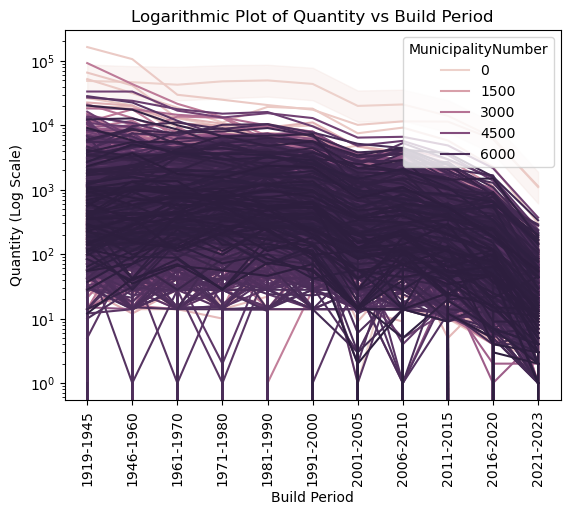

In [106]:

sns.lineplot(data=territory_df[~(territory_df["build_period"]=="Vor 1919")], x="build_period", y="quantity", hue="MunicipalityNumber")

# Set the y-axis to logarithmic scale
plt.yscale("log")

# Add labels and title (optional)
plt.xlabel("Build Period")
plt.ylabel("Quantity (Log Scale)")
plt.title("Logarithmic Plot of Quantity vs Build Period")
plt.xticks(rotation=90)